# Mathematical Underpinnings - Lab 4

In [1]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde, pearsonr
# from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import mutual_info_score
import seaborn as sns
import pandas as pd

## Task 1

### a)

#### bp 1)

In [2]:
# a heatmap
# you may use pcolormesh function and draw a heatmap for a sample
# or draw a heatmap for a teoretic density function

# I give you an answer to that task, because it may take too much time to do it during labs. 

In [3]:
def plot_xyz(data_2d, nbins=300):
    x = data_2d[:,0]
    y = data_2d[:,1]
    k = gaussian_kde([x, y])
    xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
    zi = k(np.vstack([xi.flatten(), yi.flatten()]))
    return xi, yi, zi

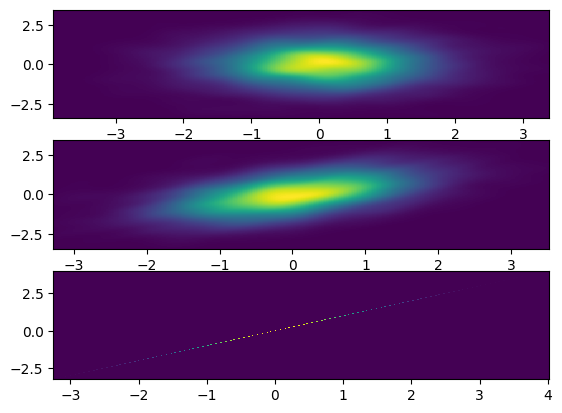

In [4]:
fig, axs = plt.subplots(3)

n = 5000

data_2d = np.random.multivariate_normal(np.zeros(2), np.array([[1, 0], [0, 1]]), n)
xi_0, yi_0, zi_0 = plot_xyz(data_2d)
data_2d = np.random.multivariate_normal(np.zeros(2), np.array([[1, 0.5], [0.5, 1]]), n)
xi_1, yi_1, zi_1 = plot_xyz(data_2d)
data_2d = np.random.multivariate_normal(np.zeros(2), np.array([[1, 1], [1, 1]]), n)
xi_2, yi_2, zi_2 = plot_xyz(data_2d)
 
# Make the plot
axs[0].pcolormesh(xi_0, yi_0, zi_0.reshape(xi_0.shape), shading='auto')
axs[1].pcolormesh(xi_1, yi_1, zi_1.reshape(xi_1.shape), shading='auto')
axs[2].pcolormesh(xi_2, yi_2, zi_2.reshape(xi_2.shape), shading='auto')
plt.show()

#### bp 2)

In [5]:
# pearsonr - Pearson correlation
# use sklearn.metrics.mutual_info_score although it is not the best option 
#       (as it takes max over permutations of classes of r.v. instead of computing one value and returning it)

#### bp 3)

In [6]:
rho_seq = np.linspace(0, 1, 10)
n = 1000
rho = 0.5
N = 100

cor_pearson_results = np.zeros((N, np.shape(rho_seq)[0]))
mi_results = np.zeros((N, np.shape(rho_seq)[0]))

for i in range(np.shape(rho_seq)[0]):
    rho = rho_seq[i]
    for j in range(N):
        data_2d = np.random.multivariate_normal(np.zeros(2), np.array([[1, rho], [rho, 1]]), n)

        cor_pearson_results[j, i] = pearsonr(data_2d[:,0], data_2d[:,1])[0]

        x_bins = np.linspace(data_2d[:,0].min(), data_2d[:,0].max(), 10)
        y_bins = np.linspace(data_2d[:,1].min(), data_2d[:,1].max(), 10)

        x_discrete = np.digitize(data_2d[:,0], bins=x_bins)
        y_discrete = np.digitize(data_2d[:,1], bins=y_bins)

        mi_results[j, i] = mutual_info_score(x_discrete, y_discrete)

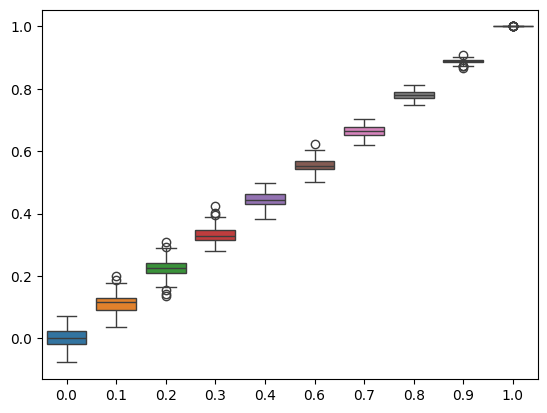

In [7]:
sns.boxplot(cor_pearson_results)
plt.xticks(np.arange(0,10,1), np.round(rho_seq, 1))
plt.show()

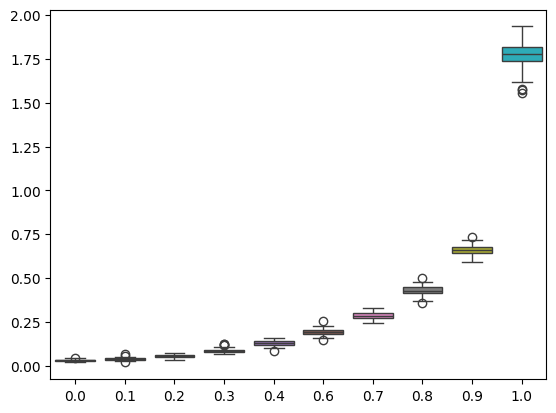

In [8]:
sns.boxplot(mi_results)
plt.xticks(np.arange(0,10,1), np.round(rho_seq, 1))
plt.show()

#### bp 4)

A hint: note that mutual information between two correlated normal distributions i.e. when $(X, Y)\sim \mathcal{N}((0,0)', \Sigma)$ and
$$\Sigma = \begin{pmatrix}
        \sigma_x^2 & \rho \\ \rho & \sigma_y^2
    \end{pmatrix}$$
equals
$$I(X,Y) = \frac{1}{2}\log \left(\frac{\sigma_x^2\sigma_y^2}{\sigma_x^2\sigma_y^2 - \rho^2}\right).$$

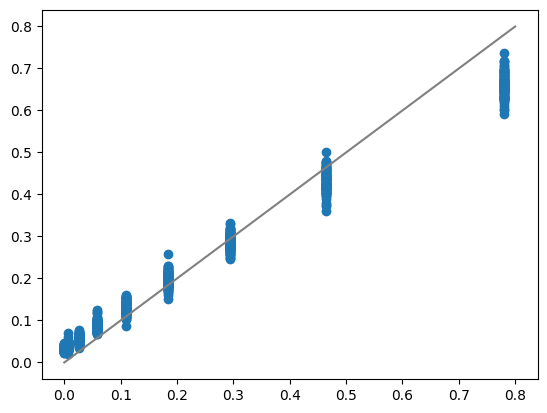

In [9]:
plt.plot(-np.log(1 - rho_seq[:9]**2)/2, mi_results[:,:9].T, "o", color='C0')
plt.plot([0,0.8], [0, 0.8], color="gray")
plt.show()

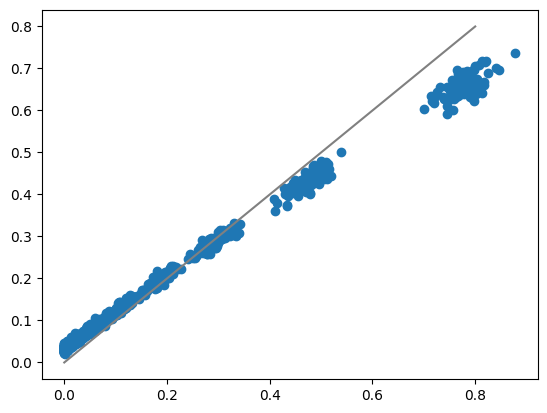

In [10]:
plt.plot(-(np.log(1 - cor_pearson_results[:,:9]**2)/2).flatten(), mi_results[:,:9].flatten(), "o")
plt.plot([0,0.8], [0, 0.8], color="gray")
plt.show()

### b)

#### bp 1)

In [11]:
# again: this is too time consuming so here is an answer

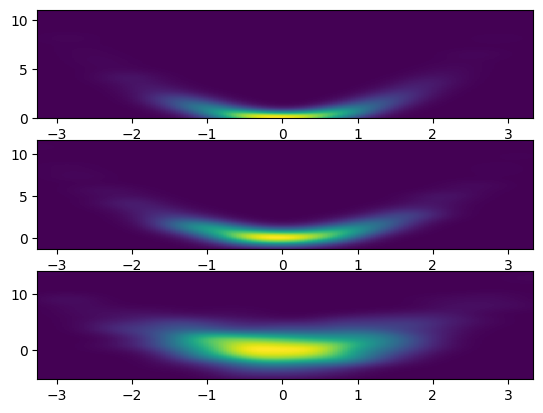

In [12]:
fig, axs = plt.subplots(3)

n = 1000
x = np.random.normal(0, 1, n)

data_2d = np.array([x, x**2 + np.random.normal(0, 0, n)]).T
xi_0, yi_0, zi_0 = plot_xyz(data_2d)
data_2d = np.array([x, x**2 + np.random.normal(0, 0.5, n)]).T
xi_1, yi_1, zi_1 = plot_xyz(data_2d)
data_2d = np.array([x, x**2 + np.random.normal(0, 2, n)]).T
xi_2, yi_2, zi_2 = plot_xyz(data_2d)
 
# Make the plot
axs[0].pcolormesh(xi_0, yi_0, zi_0.reshape(xi_0.shape), shading='auto')
axs[1].pcolormesh(xi_1, yi_1, zi_1.reshape(xi_1.shape), shading='auto')
axs[2].pcolormesh(xi_2, yi_2, zi_2.reshape(xi_2.shape), shading='auto')
plt.show()

#### bp 2) and 3)

In [13]:
eps_seq = np.exp(np.linspace(0, 1, 10))
n = 1000
N = 100

cor_pearson_results = np.zeros((N, np.shape(eps_seq)[0]))
mi_results = np.zeros((N, np.shape(eps_seq)[0]))

for i in range(np.shape(rho_seq)[0]):
    eps = eps_seq[i]
    for j in range(N):
        x = np.random.normal(0, 1, n)
        y = x**2 + np.random.normal(0, eps, n)

        cor_pearson_results[j, i] = pearsonr(x, y)[0]

        x_bins = np.linspace(x.min(), x.max(), 10)
        y_bins = np.linspace(y.min(), y.max(), 10)

        x_discrete = np.digitize(data_2d[:,0], bins=x_bins)
        y_discrete = np.digitize(data_2d[:,1], bins=y_bins)

        mi_results[j, i] = mutual_info_score(x_discrete, y_discrete)

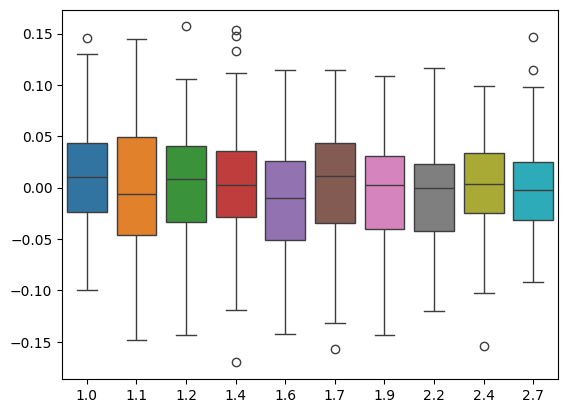

In [14]:
sns.boxplot(cor_pearson_results)
plt.xticks(np.arange(0,10,1), np.round(eps_seq, 1))
plt.show()

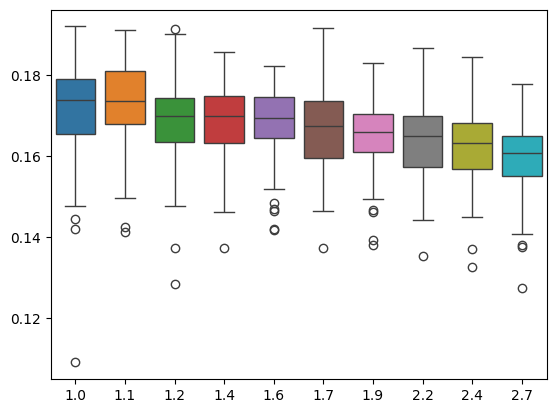

In [15]:
sns.boxplot(mi_results)
plt.xticks(np.arange(0,10,1), np.round(eps_seq, 1))
plt.show()

## Task 2

### a)

In [16]:
def indep_test_asymptotic(X, Y, stat):

    if stat == "mi":

        stat_value = 2*len(X)*mutual_info_score(X, Y)

    if stat == "chi2":

        test_res = (chi2_contingency(pd.crosstab(X, Y)))
        stat_value = test_res.statistic

    df = (len(np.unique(X)) - 1)*(len(np.unique(Y)) - 1)

    p_value = 1 - chi2.cdf(stat_value, df=df)

    return stat_value, p_value

### b)

In [17]:
def indep_test_permutation(X, Y, B, stat="mi"):

    stat_value = mutual_info_score(X, Y)

    condition_p_value = 0
    for b in range(B):
        X_b = np.random.permutation(X)

        stat_value_b = mutual_info_score(X_b, Y)

        if stat_value <= stat_value_b:
            condition_p_value += 1

    p_value = (1 + condition_p_value)/(1 + B)

    return 2*len(X)*stat_value, p_value

### c)

**Independent r.v.**

A hint: two discretized independent normal random variables (or any two independent discrete r.v.)

In [18]:
# independent r.v. - we expect that our tests don't reject the null hypothesis

sample_size = 1000
X = np.random.normal(0, 1, sample_size)
Y = np.random.normal(0, 1, sample_size)

X_bins = np.linspace(X.min(), X.max(), 10)
Y_bins = np.linspace(Y.min(), Y.max(), 10)

X_discrete = np.digitize(X, bins=X_bins)
Y_discrete = np.digitize(Y, bins=Y_bins)

In [19]:
print("Asymptotic test based on mutual information:")
pvalue = indep_test_asymptotic(X_discrete, Y_discrete, "mi")[1]
print(f'p-value: {pvalue}')
if indep_test_asymptotic(X_discrete, Y_discrete, "mi")[1] < 0.05:
    print("Reject the null hypothesis")
else:
    print("Don't reject the null hypothesis")

Asymptotic test based on mutual information:
p-value: 0.8624961627664478
Don't reject the null hypothesis


In [20]:
print("Pearson’s chi-squared test:")
pvalue = indep_test_asymptotic(X_discrete, Y_discrete, "chi2")[1]
print(f'p-value: {pvalue}')
if pvalue < 0.05:
    print("Reject the null hypothesis")
else:
    print("Don't reject the null hypothesis")

Pearson’s chi-squared test:
p-value: 0.8856780220586171
Don't reject the null hypothesis


In [21]:
print("Permutation test:")
pvalue = indep_test_permutation(X_discrete, Y_discrete, 100, "mi")[1]
print(f'p-value: {pvalue}')
if pvalue < 0.05:
    print("Reject the null hypothesis")
else:
    print("Don't reject the null hypothesis")

Permutation test:
p-value: 0.5346534653465347
Don't reject the null hypothesis


**Dependent r.v.**

A hint: two discretized dependent normal random variables (or two categorical wuch that we enforce $X=Y$ for a subset of observations)

In [22]:
# independent r.v. - ideally we will reject the null hypothesis

In [23]:
mean = [0, 0]
covariance_matrix = [[1, 0.5], [0.5, 1]]
sample_size = 1000 

sample = np.random.multivariate_normal(mean, covariance_matrix, sample_size)
X = sample[:, 0]
Y = sample[:, 1]

X_bins = np.linspace(X.min(), X.max(), 10)
Y_bins = np.linspace(Y.min(), Y.max(), 10)

X_discrete = np.digitize(X, bins=X_bins)
Y_discrete = np.digitize(Y, bins=Y_bins)

In [24]:
print("Asymptotic test based on mutual information:")
pvalue = indep_test_asymptotic(X_discrete, Y_discrete, "mi")[1]
print(f'p-value: {pvalue}')
if indep_test_asymptotic(X_discrete, Y_discrete, "mi")[1] < 0.05:
    print("Reject the null hypothesis")
else:
    print("Don't reject the null hypothesis")

Asymptotic test based on mutual information:
p-value: 0.0
Reject the null hypothesis


In [25]:
print("Pearson’s chi-squared test:")
pvalue = indep_test_asymptotic(X_discrete, Y_discrete, "chi2")[1]
print(f'p-value: {pvalue}')
if pvalue < 0.05:
    print("Reject the null hypothesis")
else:
    print("Don't reject the null hypothesis")

Pearson’s chi-squared test:
p-value: 0.0
Reject the null hypothesis


In [26]:
print("Permutation test:")
pvalue = indep_test_permutation(X_discrete, Y_discrete, 100, "mi")[1]
print(f'p-value: {pvalue}')
if pvalue < 0.05:
    print("Reject the null hypothesis")
else:
    print("Don't reject the null hypothesis")

Permutation test:
p-value: 0.009900990099009901
Reject the null hypothesis
